<a href="https://colab.research.google.com/github/Miragecore/SandBox/blob/main/AnyNetTest-fixwarning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version
!nvcc --version
!pip3 show torch

Python 3.7.13
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
Name: torch
Version: 1.10.0+cu111
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.7/dist-packages
Requires: typing-extensions
Required-by: torchvision, torchtext, torchaudio, fastai


In [15]:
# Clone AnyNet
#!git clone https://github.com/mileyan/AnyNet.git
!git clone https://github.com/Miragecore/AnyNet.git
!cd AnyNet && git checkout devel
!cd /content/

fatal: destination path 'AnyNet' already exists and is not an empty directory.
Already on 'devel'
Your branch is up to date with 'origin/devel'.


In [ ]:
%%writefile setup.sh

### wget reference from => https://linux.tips/tutorials/download-large-google-drive-files-with-wget-in-terminal

### AnyNet Pretrained model : https://drive.google.com/file/d/18Vi68rQO-vcBn3882vkumIWtGggZQDoU/view?usp=sharing
### Anynet Pretrained Model File ID : 18Vi68rQO-vcBn3882vkumIWtGggZQDoU
wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=18Vi68rQO-vcBn3882vkumIWtGggZQDoU' -O 'checkpoint.zip'

#### KITTI Sceneflow https://drive.google.com/file/d/1qm1TEI_trB6_B1je8oRhwbfRIUgs2knH/view?usp=sharing
###file ID : 1qm1TEI_trB6_B1je8oRhwbfRIUgs2knH
wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1qm1TEI_trB6_B1je8oRhwbfRIUgs2knH' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1qm1TEI_trB6_B1je8oRhwbfRIUgs2knH" -O KITTI_SceneFlow2015.zip && rm -rf /tmp/cookies.txt

if [ -d "checkpoint" ]; then
  ### Take action if $DIR exists ###
  echo "remove Last pretrained checkpoint.."
  rm -rf checkpoint
fi

echo "unzip pretrained model to checkpoint dir"
unzip checkpoint.zip

if [ -d "KITTI_SceneFlow2015" ]; then
  ### Take action if $DIR exists ###
  echo "remove Last KITTI_SceneFlow2015.."
  rm -rf KITTI_SceneFlow2015
fi

echo "unzip pretrained model to checkpoint dir"
unzip KITTI_SceneFlow2015.zip -d KITTI_SceneFlow2015

mkdir results

###build spn module
cd AnyNet/Models/spn_t1
./make.sh

In [ ]:
%cd /content
!chmod +x ./setup.sh
!./setup.sh

In [12]:
%pwd
%cd AnyNet/models/spn_t1
%pwd
!./make.sh

[Errno 2] No such file or directory: 'AnyNet/models/spn_t1'
/content/AnyNet/models/spn_t1
running clean
running build
running build_ext
/usr/local/lib/python3.7/dist-packages/torch/utils/cpp_extension.py:381: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
building 'gaterecurrent2dnoind_cuda' extension
creating build
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/src
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-dIfpci/python3.7-3.7.13=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-dIfpci/python3.7-3.7.13=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/torch/include -I/usr/local/lib

In [13]:
%cd /content

/content


In [21]:
%cd AnyNet
!git pull

[Errno 2] No such file or directory: 'AnyNet'
/content/AnyNet
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 4 (delta 3), reused 4 (delta 3), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/Miragecore/AnyNet
   87e6309..f73bdf4  devel      -> origin/devel
Updating 87e6309..f73bdf4
Fast-forward
 models/anynet.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


In [22]:
!python /content/AnyNet/finetune.py --maxdisp 192 --with_spn --datapath /content/KITTI_SceneFlow2015/training/ \
    --save_path /content/results/kitti2015 --datatype 2015 --pretrained /content/checkpoint/kitti2015_ck/checkpoint.tar \
    --split_file /content/checkpoint/kitti2015_ck/split.txt --evaluate

[2022-03-28 18:22:49 KITTIloader2015.py:33] INFO     [13, 32, 36, 37, 38, 43, 46, 54, 58, 62, 75, 76, 79, 82, 92, 93, 99, 106, 108, 114, 115, 117, 124, 131, 135, 138, 139, 141, 144, 148, 159, 162, 164, 167, 176, 179, 182, 192, 193, 199]
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
[2022-03-28 18:22:49 finetune.py:80] INFO     channels_3d: 4
[2022-03-28 18:22:49 finetune.py:80] INFO     datapath: /content/KITTI_SceneFlow2015/training/
[2022-03-28 18:22:49 finetune.py:80] INFO     datatype: 2015
[2022-03-28 18:22:49 finetune.py:80] INFO     epochs: 300
[2022-03-28 18:22:49 finetune.py

In [23]:
import AnyNet.models.anynet as models
from PIL import Image
import PIL
from AnyNet.dataloader import KITTILoader as DA
import AnyNet.utils.logger as logger
from AnyNet.dataloader import KITTIloader2015 as ls
import torch
import torchvision.transforms as transforms
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [24]:
import easydict
import logging
import torch.nn as nn
import torch.nn.parallel

args = easydict.EasyDict({"init_channels": 1 , 
                          "maxdisplist": [12,3,3],  
                          "spn_init_channels" : 8,
                          "nblocks" : 2,
                          "layers_3d" : 4,
                          "channels_3d" : 4,
                          "growth_rate" : [4,1,1],
                          "with_spn" : True,
                          "pretrained" : "/content/checkpoint/kitti2015_ck/checkpoint.tar"})

model = models.AnyNet(args)
model = nn.DataParallel(model).cuda()
checkpoint = torch.load(args.pretrained)
model.load_state_dict(checkpoint['state_dict'], strict=False)

<All keys matched successfully>

In [25]:
%cd /content

/content


torch.Size([1, 3, 368, 1232])
stage 0
(368, 1232, 1)


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3509: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


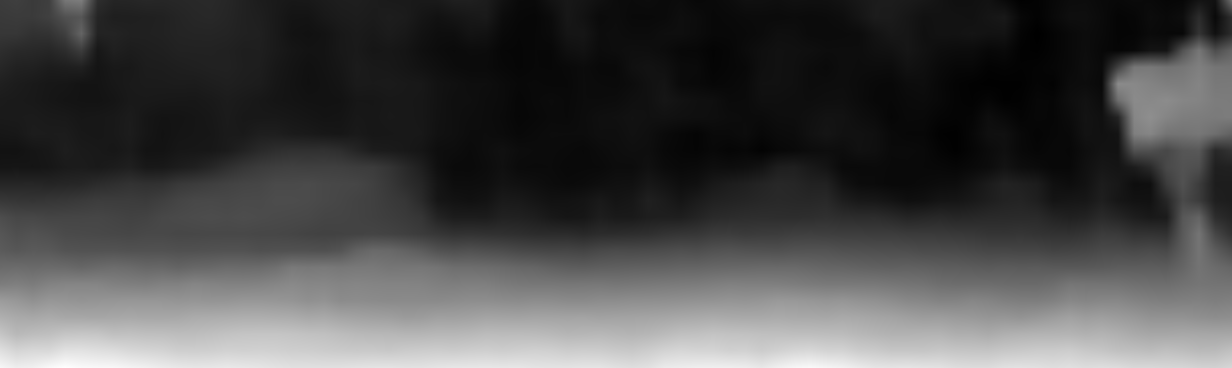

stage 1
(368, 1232, 1)


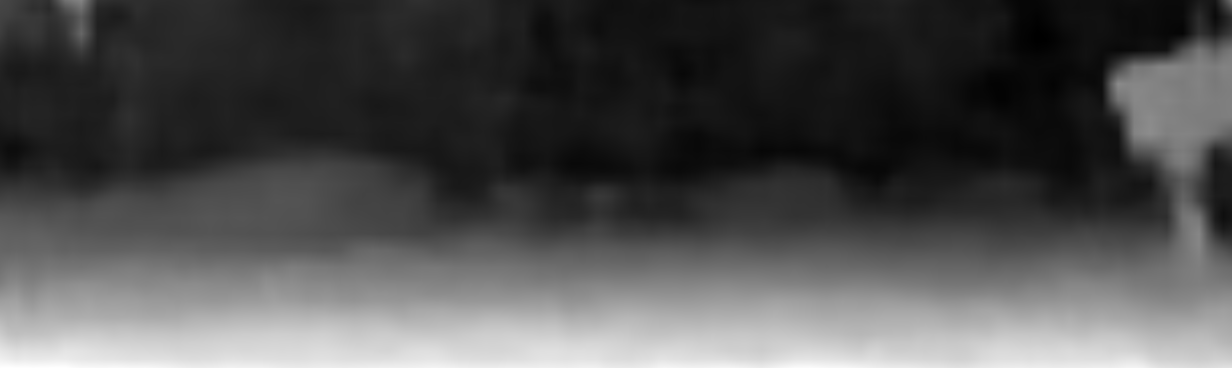

stage 2
(368, 1232, 1)


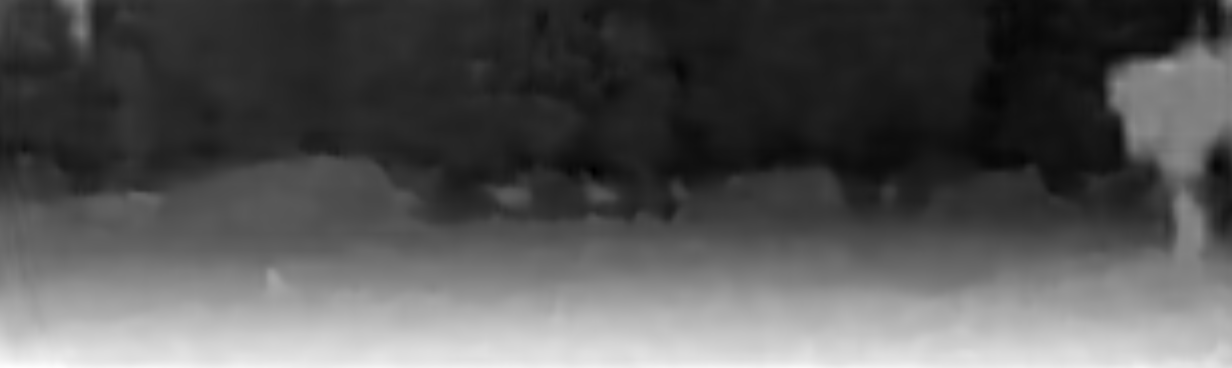

stage 3
(368, 1232, 1)


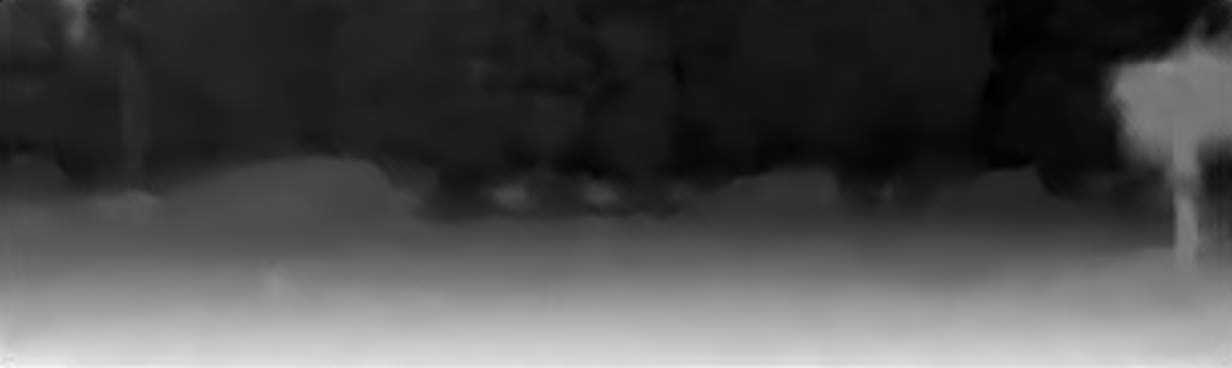

In [26]:
left = Image.open('/content/KITTI_SceneFlow2015/testing/image_2/000000_10.png').convert('RGB')
right = Image.open('/content/KITTI_SceneFlow2015/testing/image_3/000000_10.png').convert('RGB')

left = left.crop((0,0,1232, 368))
right = right.crop((0,0,1232, 368))

tf = transforms.ToTensor()
left = tf(left).unsqueeze(0)
right = tf(right).unsqueeze(0)

print(left.shape)

predict = model(left, right)
predict[0].detach()
for i in range(4):
  print('stage ' + str(i))
  #img = data['img'] # Tensor형태의 이미지. [C, H, W]
  img = predict[i].detach().cpu().numpy() # tensor -> numpy
  img = img.squeeze(axis=(0,))
  img = np.transpose(img, (1, 2, 0)) # [C,H,W] -> [H,W,C]
  print(img.shape)
  img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # RGB 채널
  img = img.astype(np.uint8).copy() # np.float32 -> np.uint8
  cv2_imshow(img)

